In [106]:
import numpy as np
import pandas as pd
from woocommerce import API
import timeout_decorator
import json
from sys import platform
import seaborn as sns
import random


In [5]:
wcapi = API(
    url="http://localhost/wordpress",
    consumer_key="ck_29870b1cca39145bcaa62d266e2c097c9bc5cca2",
    consumer_secret="cs_f43b1c0b4d995487e58ff885cf32a45b8217db63",
    wp_api=True,
    version="wc/v3",
    timeout=900000
)

In [6]:
def popular_clientes():
    text = open('usuarios_woocommerce.json').read()
    customers = json.loads(text)

    for i in customers:
        print(wcapi.post("customers", i).json())

popular_clientes()

{'code': 'registration-error-email-exists', 'message': 'Uma conta já está registrada com seu endereço de e-mail. <a href="#" class="showlogin">Faça login.</a>', 'data': {'status': 400}}
{'code': 'registration-error-email-exists', 'message': 'Uma conta já está registrada com seu endereço de e-mail. <a href="#" class="showlogin">Faça login.</a>', 'data': {'status': 400}}
{'id': 6, 'date_created': '2022-08-14T11:11:29', 'date_created_gmt': '2022-08-14T14:11:29', 'date_modified': '2022-08-14T11:11:35', 'date_modified_gmt': '2022-08-14T14:11:35', 'email': 'ewalstow2@illinois.edu', 'first_name': 'Der', 'last_name': 'Caveney', 'role': 'customer', 'username': 'ewalstow2', 'billing': {'first_name': 'Eolande', 'last_name': 'Walstow', 'company': 'Lazz', 'address_1': '3 Kennedy Way', 'address_2': '12340 Village Green Park', 'city': 'Plano', 'postcode': '75074', 'country': 'United States', 'state': 'Texas', 'email': 'ewalstow2@sakura.ne.jp', 'phone': '2143565732'}, 'shipping': {'first_name': '', 'l

In [21]:
def popular_produtos():
    text = open('produtos_woocommerce.json').read()
    products = json.loads(text)

    for i in products:
        print(wcapi.post("products", i).json())

popular_produtos()

{'id': 19, 'name': 'Dakota Club', 'slug': 'dakota-club', 'permalink': 'http://localhost/wordpress/index.php/produto/dakota-club/', 'date_created': '2022-08-14T14:55:56', 'date_created_gmt': '2022-08-14T17:55:56', 'date_modified': '2022-08-14T14:55:56', 'date_modified_gmt': '2022-08-14T17:55:56', 'type': 'simple', 'status': 'publish', 'featured': False, 'catalog_visibility': 'visible', 'description': 'ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices', 'short_description': 'eu nibh', 'sku': '', 'price': '25918.59', 'regular_price': '25918.59', 'sale_price': '', 'date_on_sale_from': None, 'date_on_sale_from_gmt': None, 'date_on_sale_to': None, 'date_on_sale_to_gmt': None, 'on_sale': False, 'purchasable': True, 'total_sales': 0, 'virtual': False, 'downloadable': False, 'downloads': [], 'download_limit': -1, 'download_expiry': -1, 'external_url': '', 'button_text': '', 'tax_status': 'taxable', 'tax_class': '', 'mana

In [174]:
def generate_popular_numbers(avg, std_dev, number_of_reviews, bigger, smaller, conver_int):     
    pct_to_target = np.random.normal(avg, std_dev, number_of_reviews).round(2)
    
    pct_to_target = filter(lambda x: x > smaller and x < bigger, pct_to_target)
    pct_to_target = list(pct_to_target)
    
    if(conver_int):
        pct_to_target = map(lambda x: int(x), pct_to_target)
        pct_to_target = list(pct_to_target)
    
    return pct_to_target


<AxesSubplot:xlabel='Count'>

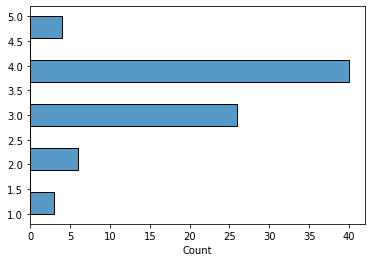

In [242]:

popular_products = generate_popular_numbers(50, 20, 500, 117, 1, True)
# sns.histplot(y=popular_products)

popular_rating = generate_popular_numbers(4.2, 1, 100, 5.1, 0, True)
sns.histplot(y=popular_rating)

In [297]:
def get_one_random_item(list):
    random_index = random.randint(1,len(list) - 1)
    return list[random_index]
     

get_one_random_item(popular_products)

37

In [298]:
def generate_review(produtcts, reviews):
    product = get_one_random_item(produtcts)
    rating = get_one_random_item(reviews)

    return dict({
        "product_id": product,
        "review": "Random review",
        "reviewer": "A random user",
        "reviewer_email": "a_random_user@gmail.com",
        "rating": rating
    })

generate_review(popular_products, popular_rating)

{'product_id': 74,
 'review': 'Random review',
 'reviewer': 'A random user',
 'reviewer_email': 'a_random_user@gmail.com',
 'rating': 4}

In [318]:
def generate_reviews(produtcts, reviews, number_of_simulations):
    random_reviews = []

    for _ in range(number_of_simulations):
        new_review = generate_review(produtcts, reviews)
        random_reviews.append(new_review)
    
    return random_reviews

reviews = generate_reviews(popular_products, popular_rating, 1)
reviews

[{'product_id': 59,
  'review': 'Random review',
  'reviewer': 'A random user',
  'reviewer_email': 'a_random_user@gmail.com',
  'rating': {'product_id': 72,
   'review': 'Random review',
   'reviewer': 'A random user',
   'reviewer_email': 'a_random_user@gmail.com',
   'rating': {'product_id': 67,
    'review': 'Random review',
    'reviewer': 'A random user',
    'reviewer_email': 'a_random_user@gmail.com',
    'rating': {'product_id': 80,
     'review': 'Random review',
     'reviewer': 'A random user',
     'reviewer_email': 'a_random_user@gmail.com',
     'rating': {'product_id': 73,
      'review': 'Random review',
      'reviewer': 'A random user',
      'reviewer_email': 'a_random_user@gmail.com',
      'rating': {'product_id': 60,
       'review': 'Random review',
       'reviewer': 'A random user',
       'reviewer_email': 'a_random_user@gmail.com',
       'rating': {'product_id': 76,
        'review': 'Random review',
        'reviewer': 'A random user',
        'reviewer_em

In [48]:
avg = 5
std_dev = .1
num_reps = 500
num_simulations = 1000

pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
pct_to_target

array([4.94, 5.1 , 5.08, 4.89, 4.99, 5.07, 4.85, 5.02, 4.93, 5.11, 5.18,
       4.88, 4.87, 4.95, 5.07, 4.96, 4.92, 4.95, 5.15, 4.97, 5.07, 5.06,
       4.9 , 5.22, 5.02, 4.88, 5.01, 4.89, 4.88, 5.03, 4.89, 5.05, 5.  ,
       5.06, 4.94, 4.86, 4.97, 5.05, 4.95, 5.22, 5.07, 4.86, 4.92, 5.07,
       4.85, 4.86, 4.96, 4.95, 5.11, 4.96, 5.11, 5.08, 5.09, 4.95, 4.83,
       5.02, 4.89, 4.78, 4.94, 5.05, 4.99, 4.97, 4.96, 4.99, 4.82, 4.94,
       5.11, 4.92, 4.91, 4.88, 4.94, 4.88, 4.91, 4.97, 5.13, 4.97, 4.96,
       4.94, 5.17, 5.01, 4.98, 5.06, 4.94, 5.01, 4.93, 5.09, 5.03, 5.12,
       4.94, 5.09, 4.88, 5.12, 4.81, 5.08, 5.06, 4.99, 5.03, 5.04, 5.05,
       5.01, 4.94, 5.01, 4.92, 4.99, 5.15, 4.9 , 4.88, 5.02, 5.15, 4.99,
       4.9 , 5.08, 4.82, 5.17, 4.86, 5.1 , 5.13, 5.01, 5.06, 5.02, 4.95,
       5.03, 4.85, 4.92, 5.17, 4.96, 5.06, 4.98, 5.  , 5.  , 5.07, 5.13,
       4.95, 5.  , 4.95, 5.11, 5.29, 4.92, 4.86, 5.09, 5.06, 4.91, 5.12,
       4.96, 4.98, 4.98, 4.96, 5.32, 5.01, 4.96, 4.